In [33]:
import pandas as pd
import numpy as np
from cherenkovdeconvolution import util

#p.set_printoptions(threshold=np.inf)
#df = pd.read_csv('sample.csv')
df=pd.read_csv('sample.csv', nrows=1000)
#print(df.head(8))
#X = df[['SplineMPEDirectHitsD.dir_track_length',
#'SPEFit2_HVFitParams.nmini'                       ,
#'LineFitGeoSplit2.zenith',
#   'SplineMPE.zenith'    ,
#     'SplineMPE.azimuth' 
#       'SPEFit2GeoSplit1BayesianFitParams.nmini',
#       'SPEFit2Bayesian.x',
#       'VariousVariables.Cone_Angle',
#       'SPEFit2TimeSplit1FitParams.logl',
#       'weight_honda_h4a']]
X = df[['SPEFit2Bayesian.x',
        'SPEFit2BayesianFitParams.nmini',
        'SPEFit2_HVFitParams.nmini',
        'SplineMPE.zenith',
        'SplineMPECharacteristicsIC.avg_dom_dist_q_tot_dom',
        'SplineMPEDirectHitsD.dir_track_length',
        'SplineMPEDirectHitsICB.n_early_strings',
        'SplineMPEDirectHitsICB.n_late_doms',
        'SplineMPEDirectHitsICD.n_dir_strings',
        'SplineMPEDirectHitsICE.n_late_strings',
        'SplineMPETruncatedEnergy_SPICEMie_AllDOMS_MuEres.value']]

Y = df['MCPrimary.energy']
#'Dustyness.n_doms_in_dust','BestTrackDirectHitsICC.n_early_strings',
binning_E = np.logspace(np.log10(Y.min()-10),
np.log10(Y.max()+100), 13)    # creating 12 bins for the energy 



#Binning overflow & underflow manually
overflow = 1e10
bins_over = np.append(binning_E,overflow)
binning_E = bins_over

Y = np.digitize(Y, binning_E)  

Y = Y - 1

n_test = int(len(df)/10)

X_train = X.iloc[n_test:]#splitting the dataframe
Y_train = Y[n_test:]

X_test = X.iloc[:n_test]
Y_test = Y[:n_test]

f_true = util.fit_pdf(Y_test) 
f_true


array([0.15, 0.32, 0.21, 0.16, 0.07, 0.05, 0.02, 0.01, 0.  , 0.01])

In [28]:
from mord import LogisticSE
from cherenkovdeconvolution import dsea
f_ord=dsea(X_test, X_train, Y_train,LogisticSE(alpha=1.), K = 3)
f_ord

array([9.59868151e-03, 1.17602443e-01, 3.47463637e-01, 3.22497281e-01,
       1.48072663e-01, 4.69793175e-02, 7.35767974e-03, 4.17846756e-04,
       1.04416540e-05, 9.46467155e-09, 1.75014669e-12, 6.66133815e-17])

In [29]:
from cherenkovdeconvolution import dsea
from sklearn.linear_model import LogisticRegression

f_multi = dsea(X_test, X_train, Y_train,LogisticRegression(multi_class='multinomial',max_iter=10000), K=3)#doesnt work with the default solver?

/home/jajaek/.local/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/jajaek/.local/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

In [34]:
from cherenkovdeconvolution import dsea
from sklearn.linear_model import LogisticRegression

f_multi = dsea(X_test, X_train, Y_train,LogisticRegression(solver='saga',multi_class='multinomial',max_iter=10000), K=3)
f_multi

array([0.14406636, 0.16256736, 0.14230452, 0.12232286, 0.12491142,
       0.09146517, 0.06981973, 0.08243121, 0.02346406, 0.00588039,
       0.02397623, 0.0067907 ])

In [24]:
from cherenkovdeconvolution import dsea
from sklearn.tree import ExtraTreeClassifier

f_est2 = dsea(X_test, X_train, Y_train, ExtraTreeClassifier(), K=3) 

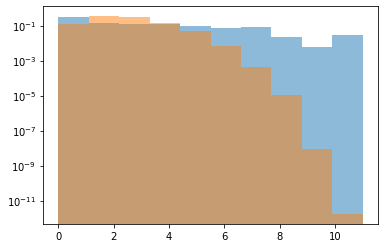

In [36]:
from matplotlib import pyplot as plt
plt.hist(range(12), weights = f_multi, alpha = 0.5)
plt.hist(range(12), weights = f_ord, alpha = 0.5)
plt.yscale('log')
plt.show()